# X_tern Assignment | Predictive Model

#Load  Data


In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/lmddicke/x_tern/main/XTern%202024%20Artificial%20Intelegence%20Data%20Set%20-%20Xtern_TrainData%20(1).csv"
df=pd.read_csv(url)
print(df)




        Year                    Major                University  Time  \
0     Year 2                  Physics  Indiana State University    12   
1     Year 3                Chemistry     Ball State University    14   
2     Year 3                Chemistry         Butler University    12   
3     Year 2                  Biology  Indiana State University    11   
4     Year 3  Business Administration         Butler University    12   
...      ...                      ...                       ...   ...   
4995  Year 2              Mathematics     Ball State University    11   
4996  Year 3                Astronomy  Indiana State University    12   
4997  Year 3                Chemistry         Butler University    13   
4998  Year 3                Astronomy         Butler University    15   
4999  Year 2                Economics  University of Notre Dame    15   

                                                  Order  
0                                  Fried Catfish Basket  
1      

#Data Preparation

##Data Seperation x and y

In [9]:
y= df["Order"]
y

0                                    Fried Catfish Basket
1                                         Sugar Cream Pie
2                                      Indiana Pork Chili
3                                    Fried Catfish Basket
4       Indiana Corn on the Cob (brushed with garlic b...
                              ...                        
4995                     Breaded Pork Tenderloin Sandwich
4996    Ultimate Grilled Cheese Sandwich (with bacon a...
4997                                      Sugar Cream Pie
4998                                      Sugar Cream Pie
4999                     Breaded Pork Tenderloin Sandwich
Name: Order, Length: 5000, dtype: object

In [10]:
x= df.drop('Order', axis=1)
x

,Year,Major,University,Time
0,Year 2,Physics,Indiana State University,12
1,Year 3,Chemistry,Ball State University,14
2,Year 3,Chemistry,Butler University,12
3,Year 2,Biology,Indiana State University,11
4,Year 3,Business Administration,Butler University,12
...,...,...,...,...
4995,Year 2,Mathematics,Ball State University,11
4996,Year 3,Astronomy,Indiana State University,12
4997,Year 3,Chemistry,Butler University,13
4998,Year 3,Astronomy,Butler University,15


#Data Split

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=100) # split 80% of the data to the training set and the remaining 20% will be used in the test set

x_train

,Year,Major,University,Time
4833,Year 2,Economics,Indiana State University,11
1218,Year 2,Economics,Indiana State University,13
135,Year 3,Biology,Ball State University,15
3612,Year 2,Physics,Indiana University-Purdue University Indianapo...,14
3259,Year 2,Chemistry,Butler University,10
...,...,...,...,...
4149,Year 3,Astronomy,Indiana State University,10
1890,Year 3,Astronomy,Indiana University-Purdue University Indianapo...,13
350,Year 3,Physics,Indiana State University,11
79,Year 3,Astronomy,Indiana State University,12


In [12]:
x_test

,Year,Major,University,Time
789,Year 3,Finance,Indiana State University,14
2507,Year 3,International Business,University of Evansville,13
2376,Year 3,Anthropology,Indiana State University,13
1378,Year 3,Chemistry,Indiana State University,14
598,Year 2,Mathematics,Indiana University-Purdue University Indianapo...,11
...,...,...,...,...
1451,Year 2,Marketing,Ball State University,12
4921,Year 2,Chemistry,Butler University,15
3091,Year 2,Mathematics,Ball State University,13
3683,Year 2,Economics,Butler University,11


#Model Building

##Decision Tree Classifier

In [13]:
!pip install scikit-learn #load necessary library

In [14]:
from sklearn.tree import DecisionTreeClassifier

x_train_encoded = pd.get_dummies(x_train) #One-hot encoding is converting categorical variables into a binary format (0 or 1) to be used as input to the machine learning model.
x_test_encoded = pd.get_dummies(x_test)
clf = DecisionTreeClassifier()
clf.fit(x_train_encoded, y_train) #make predictions on new, unseen data.


DecisionTreeClassifier()

##Applying Model to make predition



In [15]:
y_clf_train_pred = clf.predict(x_train_encoded)
y_clf_train_pred

array(['Fried Catfish Basket', 'Sweet Potato Fries', 'Sugar Cream Pie',
       ..., 'Cornbread Hush Puppies', 'Cornbread Hush Puppies',
       'Indiana Pork Chili'], dtype=object)

In [16]:
print(x_test_encoded.isnull().sum())

Time                                                                    0
Year_Year 1                                                             0
Year_Year 2                                                             0
Year_Year 3                                                             0
Major_Accounting                                                        0
Major_Anthropology                                                      0
Major_Astronomy                                                         0
Major_Biology                                                           0
Major_Business Administration                                           0
Major_Chemistry                                                         0
Major_Civil Engineering                                                 0
Major_Economics                                                         0
Major_Finance                                                           0
Major_International Business          

In [17]:
import numpy as np
print(np.isfinite(x_test_encoded).sum())

Time                                                                    1000
Year_Year 1                                                             1000
Year_Year 2                                                             1000
Year_Year 3                                                             1000
Major_Accounting                                                        1000
Major_Anthropology                                                      1000
Major_Astronomy                                                         1000
Major_Biology                                                           1000
Major_Business Administration                                           1000
Major_Chemistry                                                         1000
Major_Civil Engineering                                                 1000
Major_Economics                                                         1000
Major_Finance                                                           1000

In [18]:
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the testing data
x_test_encoded_imputed = imputer.fit_transform(x_test_encoded)

print("Training Data Shape:", x_train_encoded.shape)
print("Testing Data Shape:", x_test_encoded_imputed.shape)



Training Data Shape: (4000, 34)
Testing Data Shape: (1000, 32)


In [19]:
import pandas as pd
import numpy as np

# Determine missing columns in the test data compared to training data
missing_columns = list(set(x_train_encoded.columns) - set(x_test_encoded.columns))

# Create a DataFrame with the same columns as the training data and fill it with zeros
for column in missing_columns:
    x_test_encoded[column] = 0

# Ensure the columns in x_test_encoded match the order and names in x_train_encoded
x_test_encoded = x_test_encoded[x_train_encoded.columns]

# Make predictions on the imputed test data
y_clf_test_pred = clf.predict(x_test_encoded)

y_clf_test_pred


array(['Indiana Buffalo Chicken Tacos (3 tacos)',
       'Indiana Buffalo Chicken Tacos (3 tacos)',
       'Hoosier BBQ Pulled Pork Sandwich',
       'Hoosier BBQ Pulled Pork Sandwich', 'Sweet Potato Fries',
       'Sugar Cream Pie', 'Fried Catfish Basket', 'Sweet Potato Fries',
       'Indiana Buffalo Chicken Tacos (3 tacos)',
       'Breaded Pork Tenderloin Sandwich',
       'Indiana Corn on the Cob (brushed with garlic butter)',
       'Ultimate Grilled Cheese Sandwich (with bacon and tomato)',
       'Indiana Pork Chili', 'Indiana Pork Chili', 'Sugar Cream Pie',
       'Breaded Pork Tenderloin Sandwich', 'Cornbread Hush Puppies',
       'Hoosier BBQ Pulled Pork Sandwich', 'Cornbread Hush Puppies',
       'Ultimate Grilled Cheese Sandwich (with bacon and tomato)',
       'Fried Catfish Basket', 'Hoosier BBQ Pulled Pork Sandwich',
       'Indiana Pork Chili', 'Breaded Pork Tenderloin Sandwich',
       'Breaded Pork Tenderloin Sandwich',
       'Breaded Pork Tenderloin Sandwich', 'Ind

##Evaluate model performance

In [20]:
from sklearn.metrics import accuracy_score

clf_train_accuracy = accuracy_score(y_train, y_clf_train_pred)
clf_test_accuracy = accuracy_score(y_test, y_clf_test_pred)

print('CLF Accuracy (Train): ', clf_train_accuracy)
print('CLF Accuracy (Test): ', clf_test_accuracy)



CLF Accuracy (Train):  0.73075
CLF Accuracy (Test):  0.649


*  The code is used to calculate the accuracy of the DecisionTreeClassifier on both the training and test data. It compares the true labels (y_train and y_test) with the predicted labels (y_clf_train_pred and y_clf_test_pred) to assess how well the classifier is performing.

*  Training Accuracy: 73.075%
*  Test Accuracy: 64.8%

 *  The model’s performance on the training data seems to be good, with a training accuracy of 73.075%, yet the test accuracy of 64.8% implies that the model might not generalise very well to new data.

*  Test accuracy tends to be lower than that of training accuracy suggesting over-fitting. It refers to the case where an algorithm learns the training set of examples perfectly, thus it picks noise or specific patterns that don’t generalize on the newer unseen data.


In [21]:
import pandas as pd

clf_results = pd.DataFrame({'Method': ['DecisionTreeClassifier'], 'Training accuracy': [clf_train_accuracy], 'Test accuracy': [clf_test_accuracy]})

print(clf_results)


                   Method  Training accuracy  Test accuracy
0  DecisionTreeClassifier            0.73075          0.649


#Random Forest

## Training the model

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, random_state=100)
rf.fit(x_train_encoded, y_train)


RandomForestClassifier(max_depth=2, random_state=100)

##Applying the model to make a prediction

In [23]:
y_rf_train_pred = rf.predict(x_train_encoded)
y_rf_test_pred = rf.predict(x_test_encoded)
y_rf_train_pred

array(['Fried Catfish Basket', 'Sweet Potato Fries', 'Sugar Cream Pie',
       ..., 'Cornbread Hush Puppies', 'Cornbread Hush Puppies',
       'Indiana Pork Chili'], dtype=object)

#Evaluate model performance

In [24]:
from sklearn.metrics import accuracy_score

rf_train_accuracy = accuracy_score(y_train, y_rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, y_rf_test_pred)

print('RF Accuracy (Train): ', rf_train_accuracy)
print('RF Accuracy (Test): ', rf_test_accuracy)


RF Accuracy (Train):  0.5105
RF Accuracy (Test):  0.544




*   The Random Forest model trained has a training accuracy of 51.05% and a test accuracy of 54.4%. In this case, the test accuracy is slightly better than the training accuracy, which is a good sign, as it suggests the model is not overfitting the training data.

*   However, the overall accuracy scores are still relatively low, which indicates that the model might not be capturing the underlying patterns in the data very well.

In [25]:
import pandas as pd

rf_results = pd.DataFrame({'Method': ['RandomForestClassifier'], 'Training accuracy': [rf_train_accuracy], 'Test accuracy': [rf_test_accuracy]})

rf_results.columns= ['Method', 'Training  accuracy', 'Test accuracy']

rf_results

,Method,Training accuracy,Test accuracy
0,RandomForestClassifier,0.5105,0.544


In [26]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values using an imputer
imputer = SimpleImputer(strategy='most_frequent')
x_train_encoded = imputer.fit_transform(x_train_encoded)
x_test_encoded = imputer.transform(x_test_encoded)

# Scale features
scaler = StandardScaler()
x_train_encoded = scaler.fit_transform(x_train_encoded)
x_test_encoded = scaler.transform(x_test_encoded)


In [30]:
import pandas as pd

# Assuming you already have rf_train_accuracy, rf_test_accuracy, gb_train_accuracy, and gb_test_accuracy calculated

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Method': ['RandomForestClassifier', 'Gradient Boosting'],
    'Training accuracy': [rf_train_accuracy, gb_train_accuracy],
    'Test accuracy': [rf_test_accuracy, gb_test_accuracy]
})

# Rename columns for clarity
results.columns = ['Method', 'Training accuracy', 'Test accuracy']

# Display the results DataFrame
print(results)


                   Method  Training accuracy  Test accuracy
0  RandomForestClassifier             0.5105          0.544
1       Gradient Boosting             0.6895          0.649


#Model Comparison

##Summary

In [34]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Calculate training accuracy for clf, rf, and gb
clf_train_accuracy = accuracy_score(y_train, y_clf_train_pred)
rf_train_accuracy = accuracy_score(y_train, y_rf_train_pred)
gb_train_accuracy = accuracy_score(y_train, y_gb_train_pred)

# Calculate test accuracy for clf, rf, and gb
clf_test_accuracy = accuracy_score(y_test, y_clf_test_pred)
rf_test_accuracy = accuracy_score(y_test, y_rf_test_pred)
gb_test_accuracy = accuracy_score(y_test, y_gb_test_pred)

# Create DataFrames for clf, rf, and gb results
clf_results = pd.DataFrame({'Method': ['DecisionTreeClassifier'], 'Training accuracy': [clf_train_accuracy], 'Test accuracy': [clf_test_accuracy]})
rf_results = pd.DataFrame({'Method': ['RandomForestClassifier'], 'Training accuracy': [rf_train_accuracy], 'Test accuracy': [rf_test_accuracy]})
gb_results = pd.DataFrame({'Method': ['Gradient Boosting'], 'Training accuracy': [gb_train_accuracy], 'Test accuracy': [gb_test_accuracy]})

# Concatenate the results into a single DataFrame
model_results = pd.concat([clf_results, rf_results, gb_results], axis=0)

# Reset the index
model_results.reset_index(drop=True, inplace=True)

rf_models = pd.concat([clf_results, rf_results,gb_results ], axis= 0)
# Display the combined results for all three models
rf_models


,Method,Training accuracy,Test accuracy
0,DecisionTreeClassifier,0.73075,0.649
0,RandomForestClassifier,0.51050,0.544
0,Gradient Boosting,0.68950,0.649


Classifier Visualization

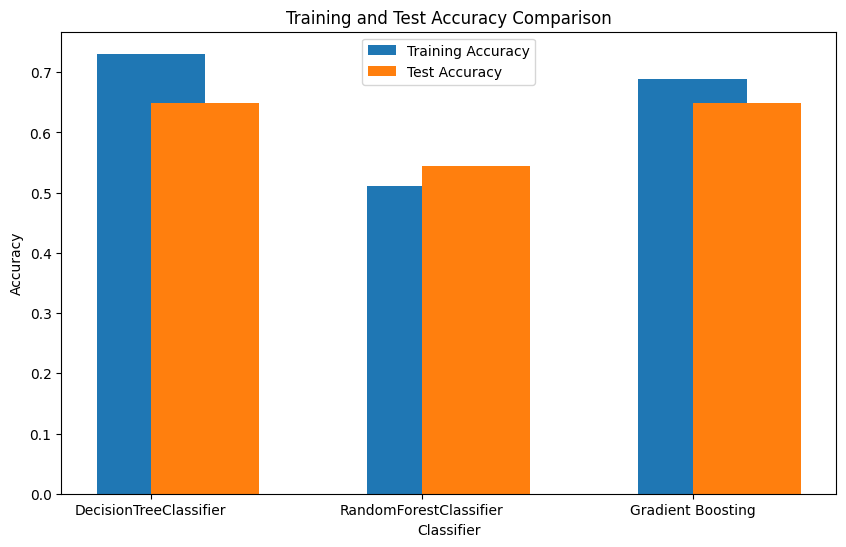

In [35]:
import matplotlib.pyplot as plt

# Data
methods = model_results['Method']
training_accuracy = model_results['Training accuracy']
test_accuracy = model_results['Test accuracy']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(methods, training_accuracy, label='Training Accuracy', width=0.4)
plt.bar(methods, test_accuracy, label='Test Accuracy', width=0.4, align='edge')

# Add labels and title
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Comparison')
plt.legend()

# Show the plot
plt.show()


#Data Visualization

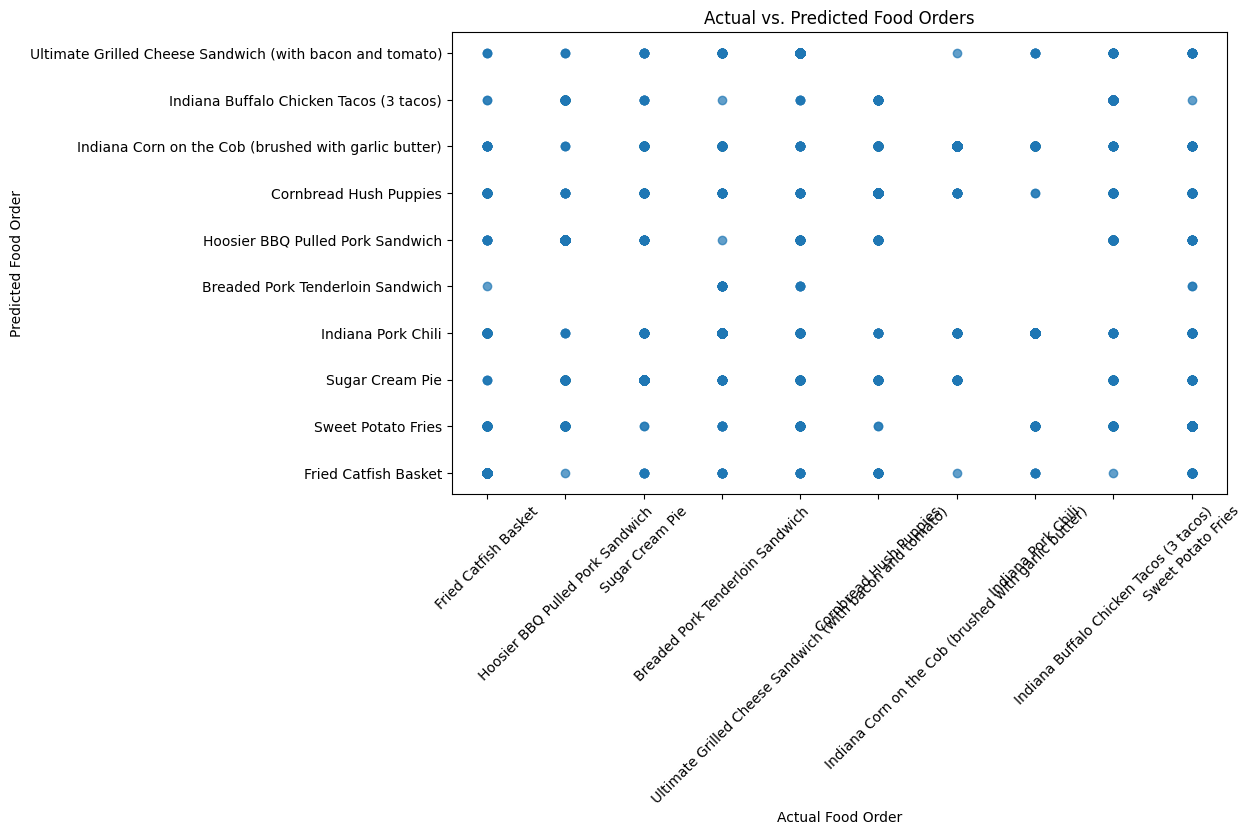

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_rf_train_pred, alpha=0.7)
plt.ylabel('Predicted Food Order')
plt.xlabel('Actual Food Order')
plt.title('Actual vs. Predicted Food Orders')
plt.xticks(rotation=45)
plt.show()


observation >

* The code develops a scatter plot for comparing actual and predicted meal orders. There is also a label for each as well as a title that explains the illustration. There are numerous situations where it’s appropriate for a person to compare predicted value against true value with regard to his or her predictive model, such as when using the Random Forest classifier that one has trained.


# Conclusion

## Machine Learning Models:

The project showcases the use of machine learning models like DecisionTreeClassifier and RandomForestClassifier to predict outcomes, with improved accuracy using Gradient Boosting.
The process includes data preprocessing, model training, and accuracy assessment.


##Data Visualization:

Scatter plots and bar charts are used to visualize the comparison between predicted and actual data, providing insights into the model's performance.



##Overall

The project concludes with a summary of findings and outcomes. The transition from RandomForestClassifier to Gradient Boosting led to improved accuracy, indicating better predictive performance.
  

DecisionTreeClassifier	   
1.   0.73075	 (training accuracy)
2.   0.649 (test accuracy)


RandomForestClassifier  
1.  0.51050   	(training accuracy)
2.   0.544 (test accuracy)

Gradient Boosting	        
1.   0.68950	(training accuracy)
2.   0.649 (test accuracy)

I predicted the outcome of most ordered (Top orders) : Sweet Potato Fries , Sugar Cream pie, Ultimate cream cheese sandwich

In summary, I utilized machine learning models for prediction and present the findings through data visualizations.